#Brand Competitor 1 vs 1 by URLs Structure - Competitive Analysis

This script consist in find the brand GAP against a competitor using the overlapped keywords calculating the Search of Voice.


---


###**Pre-requeriments**
Python 3.7 at least
####Libraries
**for GSC API**
*   httplib2
*   apiclient import errors
*   apiclient.discovery 
*   oauth2client.client 

**for SEMRush API:**

*   Urllib
*   urlparse
*   requests
*   StringIO

**for processing the data:**

*   Pandas
*   Numpy
*   Re
*   Matplotlib

####SEMRush API

*   service_url = 'https://api.semrush.com'
*   API Key = xxxxxxxxxxxxxxxxxxx

To develop this analysis is necessary to have a keyword GAP analysis pulled from SEMRush.

https://www.semrush.com/api-analytics/#domain_domains

This dataset should have the columns Keyword, brand (position), competitor (position), Search Volume, brand (urls), competitor (urls).


####Google Search Console API

we need to get the GSC API in order to get the CTR for every URL and be able to get an accurated SoV metric.

https://developers.google.com/webmaster-tools/search-console-api-original/v3/quickstart/quickstart-python

*   OAUTH_SCOPES = 'https://www.googleapis.com/auth/webmasters.readonly'
*   CLIENT_ID = 'xxxxxxxxxxxxxx'
*   CLIENT_SECRET = 'xxxxxxxxxxxxxxxxxxxx'
*   VIEW_ID = 'xxxxxxxxxxxxxxxxx'
*   start_date = 'yyyy-mm-dd'
*   end_date = 'yyyy-mm-dd'

###**Dataset Preprocessing**

####SEMRush dataset

Getting the name of the brand and competitor.

1.   Renaming some columns to understand better the dataset.
2.   Deletting the Brand URL root via regex
3.   Splitting the Brand URLs by the "/" symbol to get the categories based on the website architecture.

####Google Search Console dataset

*...work in progress...*

Getting the brand dataset for the last 12 Months. 

###**Calculating the Search of Voice**

Joinning the GSC dataset and the SEMRush dataset based on the Keyword queries to get the CTR for each keyword.

Calculating the achievable Search of Voice for each keyword.
Calculating the brand and competitor SoV for the keywords.

###**Clustering by Main categories**

Grouping the keywords by the categories extracted previously and summing the rest of the column values.
Filtering the Categories with a difference in SoV over 1.0

###**Plotting the char**

The char plotted is showing the brand and competitor SoV bars for each category compared.



##Importing libraries

In [ ]:
#!pip install --upgrade google-api-python-client
import httplib2

from apiclient import errors
from apiclient.discovery import build
from oauth2client.client import OAuth2WebServerFlow

##libraries for SEMRush API
import urllib
from urllib.parse import urlparse
import requests
from io import StringIO  

##Libraries for processing the dataset
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

##SEMRush API

Work in progress... needing SEMRush API

In [ ]:
### Load API Key and root url for API call ###
api_key = '16b2f177f5b32320b3b66fd4edcaf2da'
service_url = 'https://api.semrush.com'
brand_domain = 'https://www.knorr.com/us/en'
competitor_domain = 'https://www.myfoodandfamily.com/'
call_type = 'domain_domains'
### Function used to monitor credit use for SEMrush API ###
def semrush_call(call_type, phrase):
  params = {
      "?type": call_type,
      'key': api_key,
      'domains': '*|or|'+brand_domain+'|*|or|'+competitor_domain,
      'database': 'us', # change for different market
      'display_limit': '100',
      "export_columns":"Ph,P0,P1,P2,Co,Nq,Cp"
      }
  data = urllib.parse.urlencode(params, doseq=True)
  main_call = urllib.parse.urljoin(service_url, data)
  main_call = main_call.replace(r'%3F', r'?')
  return main_call
### Function used to parse data from semrush_call###  
def parse_response(call_data):
  results = []
  data = call_data.decode('unicode_escape')
  lines = data.split('\r\n')
  lines = list(filter(bool, lines))
  columns = lines[0].split(';')
  for line in lines[1:]:
    result = {}
    for i, datum in enumerate(line.split(';')):
      result[columns[i]] = datum.strip('"\n\r\t')
      results.append(result)
  return results

##Google Search Console API

In [ ]:
# Copy your credentials from the console
CLIENT_ID = 'YOUR_CLIENT_ID'
CLIENT_SECRET = 'YOUR_CLIENT_SECRET'

# Check https://developers.google.com/webmaster-tools/search-console-api-original/v3/ for all available scopes
OAUTH_SCOPE = 'https://www.googleapis.com/auth/webmasters.readonly'

# Redirect URI for installed apps
REDIRECT_URI = 'urn:ietf:wg:oauth:2.0:oob'

# Run through the OAuth flow and retrieve credentials
flow = OAuth2WebServerFlow(CLIENT_ID, CLIENT_SECRET, OAUTH_SCOPE, REDIRECT_URI)
authorize_url = flow.step1_get_authorize_url()
print 'Go to the following link in your browser: ' + authorize_url
code = raw_input('Enter verification code: ').strip()
credentials = flow.step2_exchange(code)

# Create an httplib2.Http object and authorize it with our credentials
http = httplib2.Http()
http = credentials.authorize(http)

webmasters_service = build('searchconsole', 'v1', http=http)

# Retrieve list of properties in account
site_list = webmasters_service.sites().list().execute()

# Filter for verified websites
verified_sites_urls = [s['siteUrl'] for s in site_list['siteEntry']
                       if s['permissionLevel'] != 'siteUnverifiedUser'
                          and s['siteUrl'][:4] == 'http']

# Print the URLs of all websites you are verified for.
for site_url in verified_sites_urls:
  print site_url
  # Retrieve list of sitemaps submitted
  sitemaps = webmasters_service.sitemaps().list(siteUrl=site_url).execute()
  if 'sitemap' in sitemaps:
    sitemap_urls = [s['path'] for s in sitemaps['sitemap']]
    print "  " + "\n  ".join(sitemap_urls)

####Building the request

In [ ]:
request = {
    'startDate': flags.start_date,
    'endDate': flags.end_date,
    'dimensions': ['query'],
    'rowLimit': 10
}
response = execute_request(service, flags.property_uri, request)
print_table(response['rows'], 'Top Queries')

work in progress

In [ ]:
#SETTING THE DATAFRAME FROM THE SEMRUSH CVS EXTRACTION
gsc_df = pd.read_csv("gsc-dove.csv", sep=',', decimal=',')
gsc_df = gsc_df.drop(columns=['Clicks','Impressions','Position'])
gsc_df = gsc_df.rename(columns={'Top queries': 'Keyword'})
##converting string percentaje to float
gsc_df['CTR'] = gsc_df['CTR'].str.rstrip('%').astype('float') / 100.0
gsc_df

,Keyword,CTR
0,unscented dry shampoo,0.1036
1,fragrance free dry shampoo,0.0816
2,dermacare scalp anti-dandruff shampoo,0.0454
3,dry shampoo foam,0.0122
4,scent free dry shampoo,0.1329
...,...,...
995,clean copypasta,1.0000
996,men's solutions leave in conditioner,1.0000
997,shampoo websites,1.0000
998,શેમ્પુ,1.0000


##Preprocessing the dataset

###Dataset from SEMRush loading


In [ ]:
#SETTING THE DATAFRAME FROM THE SEMRUSH CVS EXTRACTION
df = pd.read_csv("dove-vs-garnier.csv", sep=',', decimal=',')

###Renaming the brands columns and dropping columns 

In [ ]:
ppal_brand = input("Enter your principal brand name: ")
sec_brand = input("Enter your competitor brand name: ")

Enter your principal brand name: dove
Enter your competitor brand name: garnier


In [ ]:
df.rename(columns={ df.columns[1]: ppal_brand }, inplace = True)
df.rename(columns={ df.columns[2]: sec_brand }, inplace = True)
df.rename(columns={ df.columns[8]: ppal_brand + ' (urls)' }, inplace = True)
df.rename(columns={ df.columns[9]: sec_brand + ' (urls)' }, inplace = True)
df=df.drop(columns=['CPC','Keyword Difficulty','Competition','Results'])
print(df.columns)

Index(['Keyword', 'dove', 'garnier', 'Search Volume', 'dove (urls)',
       'garnier (urls)'],
      dtype='object')


###Splitting the urls to find brand subcategories 

In [ ]:
#Creating the category column for products
##df['Category']=df[ppal_brand + ' (urls)'].str.replace('^((https?|ftp|smtp):\/\/)?(www.)?[a-z0-9]+\.[a-z]+(\/[a-zA-Z0-9#]+\/?)+(\/[a-zA-Z0-9\-#]+\/?)', '', regex=True)
#REFERENCE FOR REGEX --->>> df['URL']=df['URL'].str.replace('https://www.dove.com/us/en/hair-care/', '', regex=False)
pd.option_context('display.max_colwidth', None)
df['Category']=df[ppal_brand + ' (urls)'].str.replace('^((https?|ftp|smtp):\/\/)?(www.)?[a-z0-9]+\.[a-z]+(\/[a-zA-Z0-9#]+\/?)', '', regex=True)
#REFERENCE FOR REGEX --->>> df['URL']=df['URL'].str.replace('https://www.nexxus.com/us/en/products/', '', regex=False)
df["Category"].head(10)

0                en/hair-care/curly-hair-products.html
1    en/hair-care/hair-styling/extra-hold-non-aeros...
2                en/hair-care/curly-hair-products.html
3                        en/hair-care/conditioner.html
4    en/hair-care/conditioner/amplified-textures-mo...
5               en/hair-care/frizzy-hair-products.html
6              en/hair-care/hair-masks-treatments.html
7    en/hair-care/hair-styling/volume-and-fullness-...
8                en/hair-care/curly-hair-products.html
9                en/hair-care/curly-hair-products.html
Name: Category, dtype: object

In [ ]:
#Cleaning the cells for Category products
#splitting and dropping the urls depending on the number of "/" on .str[number]
df['Category']=df['Category'].str.split("/", 0).str[2]
df['Category']=df['Category'].str.split(".html", 1).str[0]
df['Category']=df['Category'].str.replace("-", ' ')
print("dataframe dimension:", df.shape)
with pd.option_context('display.max_colwidth', None):
  display(df.head(15))

dataframe dimension: (2710, 7)


,Keyword,dove,garnier,Search Volume,dove (urls),garnier (urls),Category
0,curly hair,97,43,301000,https://www.dove.com/us/en/hair-care/curly-hair-products.html,https://www.garnierusa.com/hair-care-style-needs/curls,curly hair products
1,hairspray,61,86,110000,https://www.dove.com/us/en/hair-care/hair-styling/extra-hold-non-aerosol-hairspray.html,https://www.garnierusa.com/shop-products/hair-care-and-style/hairspray,hair styling
2,curly hair products,48,42,60500,https://www.dove.com/us/en/hair-care/curly-hair-products.html,https://www.garnierusa.com/shop-products/hair-care-and-style/curly-hair,curly hair products
3,conditioner,9,63,49500,https://www.dove.com/us/en/hair-care/conditioner.html,https://www.garnierusa.com/about-our-brands/fructis/sleek-and-shine/sleek-shine-conditioner,conditioner
4,leave in conditioner,82,69,49500,https://www.dove.com/us/en/hair-care/conditioner/amplified-textures-moisture-lock-leave-in-conditioner.html,https://www.garnierusa.com/about-our-brands/fructis/sleek-and-shine/sleek-and-shine-intensely-smooth-leave-in-conditioning-cream,conditioner
5,frizzy hair,42,16,33100,https://www.dove.com/us/en/hair-care/frizzy-hair-products.html,https://www.garnierusa.com/tips-how-tos/how-to-treat-frizzy-hair,frizzy hair products
6,hair mask,48,21,33100,https://www.dove.com/us/en/hair-care/hair-masks-treatments.html,https://www.garnierusa.com/tips-how-tos/hair-masks-what-are-they-all-about,hair masks treatments
7,hair mousse,68,16,33100,https://www.dove.com/us/en/hair-care/hair-styling/volume-and-fullness-mousse.html,https://www.garnierusa.com/shop-products/hair-care-and-style/hair-mousse,hair styling
8,shampoo for curly hair,68,36,22200,https://www.dove.com/us/en/hair-care/curly-hair-products.html,https://www.garnierusa.com/about-our-brands/fructis/curl-nourish/curl-nourish-shampoo,curly hair products
9,best shampoo for curly hair,89,84,18100,https://www.dove.com/us/en/hair-care/curly-hair-products.html,https://www.garnierusa.com/about-our-brands/fructis/curl-nourish/curl-nourish-shampoo,curly hair products


##Creating achievable SoV and SoV by brand (GSC merging)
This calculus is made crossing the Keywords CTR pulled from GSC.

In [ ]:
df3 = pd.merge(df, gsc_df)
df3.sort_values(by=['CTR'], ascending=False)
df3

,Keyword,dove,garnier,Search Volume,dove (urls),garnier (urls),Category,CTR
0,curly hair,97,43,301000,https://www.dove.com/us/en/hair-care/curly-hai...,https://www.garnierusa.com/hair-care-style-nee...,curly hair products,0.0001
1,hairspray,61,86,110000,https://www.dove.com/us/en/hair-care/hair-styl...,https://www.garnierusa.com/shop-products/hair-...,hair styling,0.0003
2,curly hair products,48,42,60500,https://www.dove.com/us/en/hair-care/curly-hai...,https://www.garnierusa.com/shop-products/hair-...,curly hair products,0.0002
3,conditioner,9,63,49500,https://www.dove.com/us/en/hair-care/condition...,https://www.garnierusa.com/about-our-brands/fr...,conditioner,0.0001
4,frizzy hair,42,16,33100,https://www.dove.com/us/en/hair-care/frizzy-ha...,https://www.garnierusa.com/tips-how-tos/how-to...,frizzy hair products,0.0002
...,...,...,...,...,...,...,...,...
78,foam hair moisturizer,10,24,30,https://www.dove.com/us/en/hair-care/condition...,https://www.garnierusa.com/shop-products/hair-...,conditioner,0.0244
79,how to use dry shampoo mousse,6,37,30,https://www.dove.com/us/en/hair-care/dry-shamp...,https://www.garnierusa.com/tips-how-tos/how-to...,dry shampoo,0.0755
80,shampoo for dull hair,21,67,30,https://www.dove.com/us/en/hair-care/dry-hair-...,https://www.garnierusa.com/about-our-brands/wh...,dry hair treatment,0.0476
81,dry shampoo no scent,3,55,20,https://www.dove.com/us/en/hair-care/dry-shamp...,https://www.garnierusa.com/about-our-brands/fr...,dry shampoo,0.1350


####Finding the Achievable SoV, Brand SoV and Competitor SoV

In [ ]:
df3['ach SoV']=df3['Search Volume']*0.01

df3[ppal_brand + ' SOV'] = df3['CTR']*df3['ach SoV']
df3[sec_brand + ' SOV'] = (df3[sec_brand].map(ctr))*df3['ach SoV']
df3=df3.fillna(0)
df3=df3.sort_values(by=[ppal_brand + ' SOV'], ascending=False)
print("dataframe dimension:", df3.shape)
df3.head(10)

dataframe dimension: (83, 11)


,Keyword,dove,garnier,Search Volume,dove (urls),garnier (urls),Category,CTR,ach SoV,dove SOV,garnier SOV
40,best products for 3b hair,64,61,390,https://www.dove.com/us/en/hair-care/curly-hai...,https://www.garnierusa.com/tips-how-tos/curly-...,curly hair products,0.1111,3.9,0.43329,0.0
29,shampoo and conditioner for wavy hair,52,63,1000,https://www.dove.com/us/en/hair-care/curly-hai...,https://www.garnierusa.com/shop-products/hair-...,curly hair products,0.0417,10.0,0.41700,0.0
1,hairspray,61,86,110000,https://www.dove.com/us/en/hair-care/hair-styl...,https://www.garnierusa.com/shop-products/hair-...,hair styling,0.0003,1100.0,0.33000,0.0
45,fragrance free dry shampoo,1,77,390,https://www.dove.com/us/en/hair-care/dry-shamp...,https://www.garnierusa.com/about-our-brands/fr...,dry shampoo,0.0816,3.9,0.31824,0.0
0,curly hair,97,43,301000,https://www.dove.com/us/en/hair-care/curly-hai...,https://www.garnierusa.com/hair-care-style-nee...,curly hair products,0.0001,3010.0,0.30100,0.0
24,shampoo to make hair curly,63,56,1600,https://www.dove.com/us/en/hair-care/curly-hai...,https://www.garnierusa.com/about-our-brands/fr...,curly hair products,0.0118,16.0,0.18880,0.0
62,best of curly,25,91,90,https://www.dove.com/us/en/hair-care/curly-hai...,https://www.garnierusa.com/tips-how-tos/curly-...,curly hair products,0.2000,0.9,0.18000,0.0
60,niacinamide shampoo,16,44,110,https://www.dove.com/us/en/hair-care/shampoo/d...,https://www.garnierusa.com/shop-products/skin-...,shampoo,0.1429,1.1,0.15719,0.0
59,mousse for permed hair,34,30,110,https://www.dove.com/us/en/hair-care/hair-styl...,https://www.garnierusa.com/about-our-brands/fr...,hair styling,0.1111,1.1,0.12221,0.0
2,curly hair products,48,42,60500,https://www.dove.com/us/en/hair-care/curly-hai...,https://www.garnierusa.com/shop-products/hair-...,curly hair products,0.0002,605.0,0.12100,0.0


####Grouping by Category and cleaning the dataframe

In [ ]:
#TOTAL RANKINGS PER CATEGORY
categories = df3.groupby(by=['Category']).sum()
te=df3.groupby(by=['Category']).count()
categories['KWCount']=te['Keyword']
categories=categories.sort_values(by=['Search Volume'], ascending=False)
categories.reset_index(inplace=True)
categories = categories.round(1)
categories = categories.loc[categories[ppal_brand + ' SOV'] * categories[sec_brand + ' SOV'] > 0]
categories

,Category,dove,garnier,Search Volume,CTR,ach SoV,dove SOV,garnier SOV,KWCount
1,hair styling,418,540,127370,0.4,1273.7,0.8,0.1,16
2,conditioner,192,370,62880,0.0,628.8,0.2,0.1,9
5,shampoo,596,900,19050,0.3,190.5,0.6,0.6,19
8,dry shampoo,90,404,1570,0.7,15.7,0.5,0.5,10


###Plotting the graph

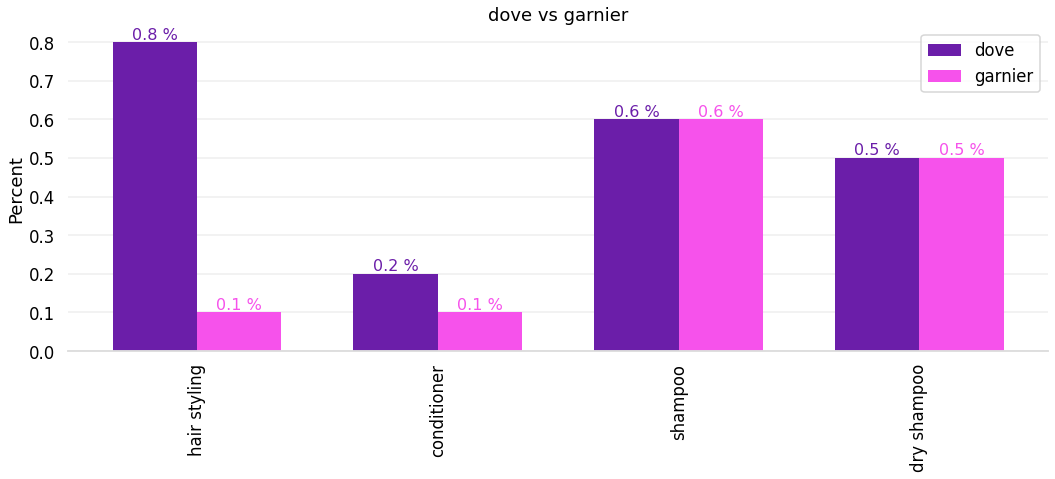

In [ ]:
sns.set_context('talk')

labels = categories['Category']
ppal = categories[ppal_brand + ' SOV']
second = categories[sec_brand + ' SOV']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
b1 = ax.bar(x - width/2, ppal, width, label=ppal_brand, color = '#6b1ea9')
b2 = ax.bar(x + width/2, second, width, label=sec_brand, color = '#f652eb')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title(ppal_brand + ' vs ' + sec_brand)
#ax.set_title('Dove vs Function of beauty')

ax.set_xticks(x)
ax.set_xticklabels(labels)
# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# You can just append this to the code above.

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}' + ' %'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=16)
plt.xticks(rotation=90)
fig.tight_layout()

plt.show()

##Creating achievable SoV and SoV by brand (CTR fixed)
This calculus is made with a prefixed CTR 



Creating the dictionary for CTR positions.

In [ ]:
ctr = {1:0.28, 2:.17,3:.1,4:.07,5:.05,6:.03,7:.02,8:.02,9:.01,10:.01}

####Finding the Achievable SoV, Brand SoV and Competitor SoV

In [ ]:
df['ach SoV']=df['Search Volume']*0.01

df[ppal_brand + ' SOV'] = (df[ppal_brand].map(ctr))*df['ach SoV']
df[sec_brand + ' SOV'] = (df[sec_brand].map(ctr))*df['ach SoV']
df=df.fillna(0)
df=df.sort_values(by=[sec_brand + ' SOV'], ascending=False)
print("dataframe dimension:", df.shape)
df.head(10)

dataframe dimension: (2710, 10)


,Keyword,dove,garnier,Search Volume,dove (urls),garnier (urls),Category,ach SoV,dove SOV,garnier SOV
33,dry curly hair,65,5,4400,https://www.dove.com/us/en/hair-care/curly-hai...,https://www.garnierusa.com/tips-how-tos/4-geni...,curly hair products,44.0,0.0,2.200
50,dry hair remedy,89,4,2900,https://www.dove.com/us/en/hair-care/shampoo/b...,https://www.garnierusa.com/tips-how-tos/causes...,shampoo,29.0,0.0,2.030
94,avocado shampoo,69,5,1300,https://www.dove.com/us/en/hair-care/shampoo/n...,https://www.garnierusa.com/about-our-brands/wh...,shampoo,13.0,0.0,0.650
574,invisible dry shampoo,24,1,170,https://www.dove.com/us/en/hair-care/dry-shamp...,https://www.garnierusa.com/about-our-brands/fr...,dry shampoo,1.7,0.0,0.476
160,dry curl,65,5,720,https://www.dove.com/us/en/hair-care/curly-hai...,https://www.garnierusa.com/tips-how-tos/4-geni...,curly hair products,7.2,0.0,0.360
85,dull hair,31,7,1600,https://www.dove.com/us/en/hair-care/dry-hair-...,https://www.garnierusa.com/tips-how-tos/hair-p...,dry hair treatment,16.0,0.0,0.320
977,moisture lock shampoo,37,1,90,https://www.dove.com/us/en/hair-care/condition...,https://www.garnierusa.com/about-our-brands/fr...,conditioner,0.9,0.0,0.252
859,anti frizz green bottle,36,1,90,https://www.dove.com/us/en/hair-care/shampoo.html,https://www.garnierusa.com/about-our-brands/fr...,shampoo,0.9,0.0,0.252
983,normal hair care,84,1,90,https://www.dove.com/us/en/hair-care/shampoo.html,https://www.garnierusa.com/tips-how-tos/how-to...,shampoo,0.9,0.0,0.252
657,hair hold,58,2,140,https://www.dove.com/us/en/hair-care/hair-styl...,https://www.garnierusa.com/shop-products/hair-...,hair styling,1.4,0.0,0.238


#### Grouping by main brand categories


In [ ]:
#TOTAL RANKINGS PER CATEGORY
categories = df.groupby(by=['Category']).sum()
te=df.groupby(by=['Category']).count()
categories['KWCount']=te['Keyword']
categories=categories.sort_values(by=['Search Volume'], ascending=False)
categories.reset_index(inplace=True)
categories = categories.round(1)
categories = categories.loc[categories[ppal_brand + ' SOV'] * categories[sec_brand + ' SOV'] > 0.5]
categories

,Category,dove,garnier,Search Volume,ach SoV,dove SOV,garnier SOV,KWCount
2,conditioner,12940,11653,153770,1537.7,5.1,0.6,215
5,shampoo,32000,29080,80080,800.8,0.8,4.0,541
10,dry shampoo,5029,5742,9450,94.5,1.2,0.6,98


####Plotting the graph

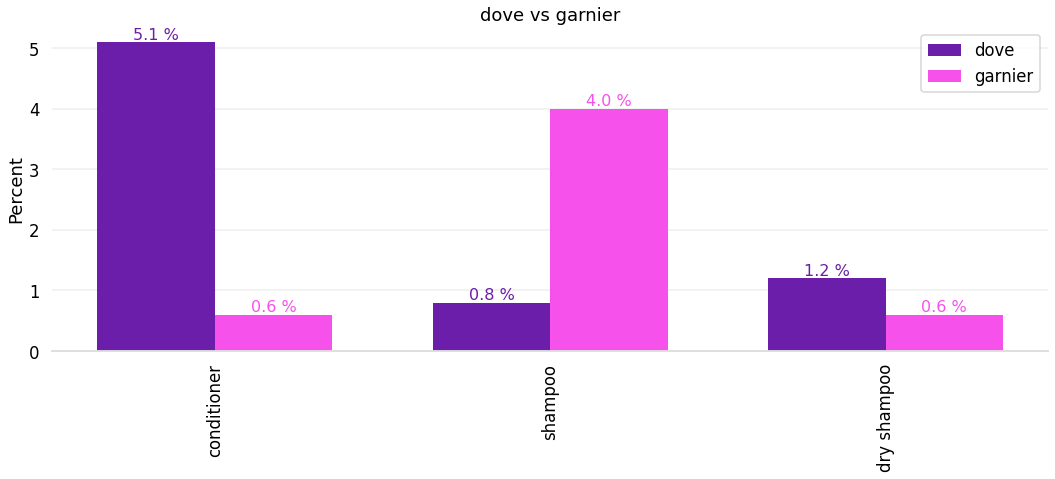

In [ ]:
sns.set_context('talk')

labels = categories['Category']
ppal = categories[ppal_brand + ' SOV']
second = categories[sec_brand + ' SOV']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
b1 = ax.bar(x - width/2, ppal, width, label=ppal_brand, color = '#6b1ea9')
b2 = ax.bar(x + width/2, second, width, label=sec_brand, color = '#f652eb')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title(ppal_brand + ' vs ' + sec_brand)
#ax.set_title('Dove vs Function of beauty')

ax.set_xticks(x)
ax.set_xticklabels(labels)
# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# You can just append this to the code above.

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}' + ' %'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=16)
plt.xticks(rotation=90)
fig.tight_layout()

plt.show()